In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import re
import pandas as pd
from IPython.display import clear_output
%matplotlib inline


frameFromEachVideo = 70
isTrain = True
if isTrain:
    folders = {'flow': 'OptFlowTrain/',
                'frames': 'FramesTrain/'}
else:
    folders = {'flow': 'OptFlowTest/',
               'frames': 'FramesTest/'}
    
if isTrain:
    target = "Train"
else:
    target = "Test"

In [2]:
'''
From: https://stackoverflow.com/questions/4623446/how-do-you-sort-files-numerically
'''
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

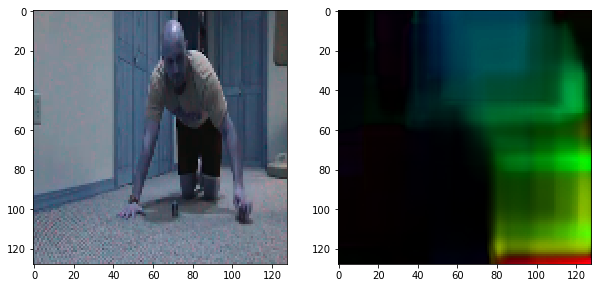

0
Enter label: 

0 - going down, 1 - going up, 2 - not in move scope


In [ ]:
frameOffset = 0
for file in os.listdir('data/')[4:]:   
    path = 'data/' + file
    
    # extract frames & optical flow frames from data
    os.system(f"python OpticalFlowGen.py --type {target} --file {path}")
    
    labels = []
    for index, image in enumerate(sorted(os.listdir(folders['frames']), key=alphanum_key)[frameOffset:frameOffset + frameFromEachVideo]):
        imPath = folders['frames'] + image
        flowPath = folders['flow'] + image

        im, flow = cv2.imread(imPath), cv2.imread(flowPath)
        f, ax = plt.subplots(1,2, figsize = (10, 10))
        ax[0].imshow(im)
        ax[1].imshow(flow)
        plt.show()

        print(index)
        print('Enter label: \n')
        print('0 - going down, 1 - going up, 2 - not in move scope')
        label = int(input())
        labels.append(label)
        print('\n\n\n')
        clear_output()
        
    ## import pandas as pd
    labels = pd.DataFrame([sorted(os.listdir(folders['frames']), key=alphanum_key), labels]).T
    labels.columns = ['frame', 'label']

    labels.to_csv(f'''{path.split("/")[-1].split('.')[0]}.csv''', index = None)
    print(len(labels.dropna()))